# Video Lectures

## Class Inheritance

### Simulations
Use a class to represent a Stochastic Process (single variable that changes randomly over time): $x_1$, $x_2$, ...

Examples:
1. Stock pirce over time
2. Measurement of solar radiation for each day
3. Average planetary surface temperature

In [1]:
class Process:
    '''Representation of Stochastic Processs'''
    
    def __init__(self, start_value = 0):
        self.value = start_value
        
    def time_step(self):
        raise NotImplementedError('function has not been completed')
        pass
    

In [2]:
p1 = Process()
p1.time_step()

NotImplementedError: function has not been completed

In [3]:
class Process:
    '''Representation of Stochastic Processs'''
    
    def __init__(self, start_value = 0):
        self.value = start_value
        
    def time_step(self):
        pass
    

In [4]:
class BoundedLinearProcess(Process):
    '''A stochastic process that develops linearly, increases by velocity
    in every time period but is bounded between 0 and 1.'''
    
    def __init__(self, start_value = 0, velocity = 0):
        super().__init__(start_value)  # calls the super/parent class
        self.velocity = velocity
        
    def time_step(self):
        self.value += self.velocity
        if self.value < 0:
            self.value = - self.value
            self.velocity = -self.velocity
        elif self.value > 1:
            self.value = 1 - (self.value - 1)
            self.velocity = -self.velocity
        super().time_step
    
    

In [5]:
p1 = BoundedLinearProcess(0, 0.3)
print(p1)

In [6]:
for i in range(4):
    p1.time_step()
    print ("Current Process value: ", p1.value)

Current Process value:  0.3
Current Process value:  0.6
Current Process value:  0.8999999999999999
Current Process value:  0.8


Adding easier ways to print 

In [51]:
class Process:
    '''Representation of Stochastic Processs'''
    
    def __init__(self, start_value = 0):
        self.value = start_value
        
    def time_step(self):
        pass
    
    def __str__(self):
        return "Process with current value " + str(self.value)
    
    def __repr__(self):
        return __str__(self)
    
    def simulate(self, steps = 30):
        for i in range(steps):
            print(self)
            self.time_step()

In [52]:
class BoundedLinearProcess(Process):
    '''A stochastic process that develops linearly, increases by velocity
    in every time period but is bounded between 0 and 1.'''
    
    def __init__(self, start_value = 0, velocity = 0):
        super().__init__(start_value)  # calls the super/parent class
        self.velocity = velocity
        
    def time_step(self):
        self.value += self.velocity
        if self.value < 0:
            self.value = - self.value
            self.velocity = -self.velocity
        elif self.value > 1:
            self.value = 1 - (self.value - 1)
            self.velocity = -self.velocity
        super().time_step
        
    def __str__(self):
        return "  " * int(self.value * 20) + '*'
    
    

In [9]:
p1 = BoundedLinearProcess(0, 0.3)
print(p1)

*


In [10]:
for i in range(4):
    p1.time_step()
    print (p1.value)

0.3
0.6
0.8999999999999999
0.8


In [11]:
# representation example
p1.value

0.8

In [12]:
for i in range(30):
    p1.time_step()
    print (p1)

                    *
        *
  *
              *
                            *
                                        *
                            *
              *
  *
        *
                    *
                                *
                                    *
                      *
          *
*
            *
                        *
                                    *
                              *
                  *
      *
    *
                *
                            *
                                      *
                          *
              *
  *
        *


Creating a Autoregressive Process of Order 1: AR(1)

$x_t = \alpha x_{t-1} + w_t, \alpha < 1$

In [14]:
import numpy as np

In [53]:
class ARprocess(Process):
    def __init__(self, alpha = 0.5, sigma = 1, start_value = 0):
        super().__init__(start_value)
        self.alpha = alpha
        self.sigma = sigma
    
    def time_step(self):
        self.value = self.alpha * self.value + np.random.normal(scale = self.sigma)
        super().time_step()
        
    def __str__(self):
        if self.value < 0:
            s = " " * int(5 * (self.value + 3)) + '*' + " " * int(-self.value * 5) + "|"
        elif self.value == 0:
            s = " " * 15 + '*'
        else:
            s = " " * 15 + '|' + " " * int(5 * self.value) + '*'
        return s
        
        

In [33]:
p2 = ARprocess()
for i in np.arange(20):
    print(p2)
    p2.time_step()
    

Process with current value 0
Process with current value 0.5397275079698656
Process with current value 1.1240605451999233
Process with current value 0.30256394390946945
Process with current value 0.03954269825482615
Process with current value 0.653385915026694
Process with current value 1.922286453460758
Process with current value 0.7256846904722277
Process with current value -0.9900036770119114
Process with current value -1.1177006159781384
Process with current value -1.908347021859601
Process with current value -1.0000970532617086
Process with current value 0.10373937490216822
Process with current value 1.0475283090480851
Process with current value 2.462669001816521
Process with current value 0.9795868389443166
Process with current value 2.0120257030204467
Process with current value 0.5644511637372654
Process with current value 1.0228049432224928
Process with current value 0.6684091286989028


In [77]:
p2 = ARprocess(alpha = .5)
for i in np.arange(30):
    print(p2)
    p2.time_step()
    

               *
               |           *
               |    *
               |      *
               | *
               |*
               |      *
               |     *
               |             *
               |          *
               |            *
            *  |
               | *
   *           |
              *|
  *            |
             * |
               |     *
               |         *
               |          *
               |         *
               |      *
            *  |
  *            |
       *       |
               |      *
               |               *
               |         *
               |      *
               |        *


In [78]:
p1 = BoundedLinearProcess(0, .1)
p2 = ARprocess(alpha = 0.9)

In [79]:
p1.simulate()

*
    *
        *
            *
                *
                    *
                        *
                            *
                              *
                                    *
                                      *
                                    *
                                *
                            *
                        *
                    *
                *
            *
        *
    *
*
  *
      *
          *
              *
                  *
                      *
                          *
                              *
                                  *


In [56]:
p2.simulate()

               *
               |    *
               |   *
              *|
               |   *
               |*
              *|
       *       |
            *  |
      *        |
         *     |
             * |
    *          |
      *        |
        *      |
      *        |
        *      |
       *       |
       *       |
            *  |
         *     |
        *      |
           *   |
     *         |
               | *
             * |
               |*
               |     *
               |           *
               |         *


Random Walk (Non Autoregressive/Stationary)

$x_t = x_{t-1} + w_t$

In [58]:
class RandomWalk(ARprocess):
    def __init__(self, sigma = 1):
        super().__init__(alpha = 1)  # this voids the auto-regression
    
    

In [60]:
p3 = RandomWalk()
p3.simulate()

               *
               |     *
               |   *
           *   |
               |*
               |     *
               |*
             * |
               |  *
               |    *
               |     *
               |       *
               |               *
               |             *
               |                           *
               |                                    *
               |                                    *
               |                                      *
               |                           *
               |                          *
               |                           *
               |                   *
               |              *
               |              *
               |             *
               |           *
               |   *
               |         *
               |       *
               |         *


## Using Polymorphism

In [71]:
# plotting the history of our simulations

import numpy as np

class Process:
    '''Representation of Stochastic Processs'''
    
    def __init__(self, start_value = 0):
        self.value = start_value
        self.history = []
        
    def time_step(self):
        self.history.append(self.value)
    
    def __str__(self):
        return "Process with current value " + str(self.value)
    
    def __repr__(self):
        return __str__(self)
    
    def simulate(self, steps = 30):
        for i in range(steps):
            print(self)
            self.time_step()
            

class BoundedLinearProcess(Process):
    '''A stochastic process that develops linearly, increases by velocity
    in every time period but is bounded between 0 and 1.'''
    
    def __init__(self, start_value = 0, velocity = 0):
        super().__init__(start_value)  # calls the super/parent class
        self.velocity = velocity
        
    def time_step(self):
        self.value += self.velocity
        if self.value < 0:
            self.value = - self.value
            self.velocity = -self.velocity
        elif self.value > 1:
            self.value = 1 - (self.value - 1)
            self.velocity = -self.velocity
        super().time_step()
        
    def __str__(self):
        return "  " * int(self.value * 20) + '*'
    
    
class ARprocess(Process):
    def __init__(self, alpha = 0.5, sigma = 1, start_value = 0):
        super().__init__(start_value)
        self.alpha = alpha
        self.sigma = sigma
    
    def time_step(self):
        self.value = self.alpha * self.value + np.random.normal(scale = self.sigma)
        super().time_step()
        
    def __str__(self):
        if self.value < 0:
            s = " " * int(5 * (self.value + 3)) + '*' + " " * int(-self.value * 5) + "|"
        elif self.value == 0:
            s = " " * 15 + '*'
        else:
            s = " " * 15 + '|' + " " * int(5 * self.value) + '*'
        return s
        
        
class RandomWalk(ARprocess):
    def __init__(self, sigma = 1):
        super().__init__(alpha = 1)  # this voids the auto-regression
    
    

In [72]:
class ProcessPlotter:
    '''An object to display the history of a process.'''
    def __init__(self, process = None):
        self.process = process
        
    def plot(slef):
        pass
    
    

In [73]:
class TextProcessPlotter(ProcessPlotter):
    def plot(self):
        upper = max(self.process.history)
        lower = min(self.process.history)
        if upper == lower:
            upper += 1
        for val in self.process.history:
            print(" " * int(20 * (val - lower)/ (upper - lower)) + '*')
            
            

In [84]:
p1 = ARprocess(alpha = .9)
plotter1 = TextProcessPlotter(p1)
p1.simulate()

               *
              *|
               | *
           *   |
            *  |
   *           |
   *           |
     *         |
       *       |
      *        |
         *     |
               |   *
               |         *
               |        *
               |   *
               |        *
               |          *
               |        *
               |           *
               |     *
               |     *
          *    |
              *|
               |  *
               |  *
             * |
               |    *
               |     *
               |     *
               |       *


In [83]:
plotter1.plot()

      *
     *
      *
         *
          *
         *
       *
         *
 *
      *
     *
    *
  *
   *
*
  *
     *
    *
   *
  *
  *
      *
      *
       *
          *
            *
                 *
                   *
                  *
                    *


In [85]:
p2 = RandomWalk()
plotter2 = TextProcessPlotter(p2)
p2.simulate()

               *
               |   *
               |       *
             * |
               |*
               |              *
               |                    *
               |                 *
               |                   *
               |                         *
               |                    *
               |                       *
               |                        *
               |                   *
               |              *
               |              *
               |              *
               |          *
               |       *
               |      *
               |         *
               |     *
               |  *
               |  *
       *       |
         *     |
       *       |
         *     |
       *       |
  *            |


In [86]:
plotter2.plot()

         *
           *
       *
        *
              *
                 *
                *
                 *
                    *
                 *
                   *
                   *
                 *
               *
              *
              *
             *
           *
          *
            *
          *
         *
         *
    *
     *
    *
     *
    *
  *
*


In [87]:
import matplotlib
%matplotlib inline

In [88]:
class GraphicProcessPlotter(ProcessPlotter):
    def plot(self):
        matplotlib.pyplot.plot(self.process.history)
        matplotlib.pyplot.title("Process Time Plot")
    
    

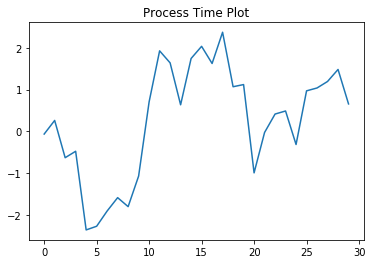

In [90]:
plotter3 = GraphicProcessPlotter(p1)
plotter3.plot()

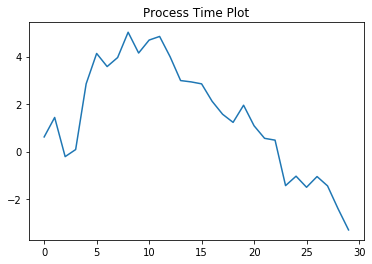

In [91]:
plotter4 = GraphicProcessPlotter(p2)
plotter4.plot()

## Magic Methods

In [99]:
class Cards:
    def __init__(self, value, suit):
        self.value = value
        self.suit = suit
    
    def __eq__(self, other):
        if self.value == other.value:
            return True
        else:
            return False
        
        

In [101]:
Cards(5, "spades")

In [102]:
Cards(6, "dimonds")

In [103]:
Cards(5, "spades") == Cards(5, "spades")

False

In [137]:
class Card:
    def __init__(self, value, suit):
        self.value = value
        self.suit = suit
    
    def __eq__(self, other):
        if self.value == other.value:
            return True
        else:
            return False

    def __lt__(self, other):
        if self.value < other.value:
            return True
        else:
            return False
    
    def __gt__(self, other):
        if self.value > other.value:
            return True
        else:
            return False
        
        

In [138]:
Card(5, "spades") == Card(5, "spades")

True

In [139]:
cards = []
for suit in ['hearts', 'spades', 'diamonds', 'clubs']:
    for value in range(0,13):
        cards.append(Card(value, suit))


In [140]:
cards[:5]

In [141]:
cards[0]

In [142]:
cards[12]

In [143]:
cards[0] < cards[12]

True

In [144]:
class Card:
    def __init__(self, value, suit):
        self.value = value
        self.suit = suit
    
    def __eq__(self, other):
        if self.value == other.value:
            return True
        else:
            return False

    def __lt__(self, other):
        if self.value < other.value:
            return True
        else:
            return False
    
    def __gt__(self, other):
        if self.value > other.value:
            return True
        else:
            return False
    
    def __repr__(self):
        return "%i of %s" % (self.value, self.suit)
    
    

In [145]:
print(Card(10, 'hearts'))

10 of hearts


In [146]:
Card(10, 'hearts')

10 of hearts

In [154]:
cards = []
for suit in ['hearts', 'spades', 'diamonds', 'clubs']:
    for value in range(1,13):
        cards.append(Card(value, suit))


In [148]:
print(cards)

[0 of hearts, 1 of hearts, 2 of hearts, 3 of hearts, 4 of hearts, 5 of hearts, 6 of hearts, 7 of hearts, 8 of hearts, 9 of hearts, 10 of hearts, 11 of hearts, 12 of hearts, 0 of spades, 1 of spades, 2 of spades, 3 of spades, 4 of spades, 5 of spades, 6 of spades, 7 of spades, 8 of spades, 9 of spades, 10 of spades, 11 of spades, 12 of spades, 0 of diamonds, 1 of diamonds, 2 of diamonds, 3 of diamonds, 4 of diamonds, 5 of diamonds, 6 of diamonds, 7 of diamonds, 8 of diamonds, 9 of diamonds, 10 of diamonds, 11 of diamonds, 12 of diamonds, 0 of clubs, 1 of clubs, 2 of clubs, 3 of clubs, 4 of clubs, 5 of clubs, 6 of clubs, 7 of clubs, 8 of clubs, 9 of clubs, 10 of clubs, 11 of clubs, 12 of clubs]


In [155]:
class Card:
    def __init__(self, value, suit):
        self.value = value
        self.suit = suit
    
    def __eq__(self, other):
        if self.value == other.value:
            return True
        else:
            return False

    def __lt__(self, other):
        if self.value < other.value:
            return True
        else:
            return False
    
    def __gt__(self, other):
        if self.value > other.value:
            return True
        else:
            return False
    
    def __repr__(self):
        return "%i of %s" % (self.value, self.suit)
    
    

In [156]:
from random import shuffle

In [157]:
shuffle(cards)
print(cards[:5])

[2 of diamonds, 10 of hearts, 8 of hearts, 4 of diamonds, 11 of hearts]


In [158]:
sorted(cards)[:5]

[1 of spades, 1 of hearts, 1 of diamonds, 1 of clubs, 2 of diamonds]

In [160]:
class Vector:
    def __init__(self, numbers):
        self.__numbers = numbers
        
    @property
    def numbers(self):
        return self.__numbers
    
    def dot(self, other):
        values = []
        if len(self.__numbers) != len(other.numbers):
            raise Exception('Cannot multiply different sized vectors.')
        for x in range(len(self.__numbers)):
            this_num = self.__numbers[x]
            other_num = other.numbers[x]
            values.append(this_num * other_num)
        return sum(values)
    
    def __mul__(self, other):
        return self.dot(other)
    
    

In [162]:
a = Vector([1, 10, 4])
b = Vector([2, -1, 5])
print(a * b)  # added ability to use * as a dot product multiplication when deadling with vectors
print(a.dot(b))

12
12


# Book Excercises

6.1. Make a class called Thing with no contents and print it. Then, create an object called example from this class and also print it. Are the printed values the same or different?

In [164]:
class Thing:
    pass

In [165]:
print(Thing)

<class '__main__.Thing'>


In [167]:
t1 = Thing()
print(t1)

6.2. Make a new class called Thing2 and assign the value 'abc' to a class variable called letters. Print letters.

In [173]:
class Thing2:
    letters = 'abc'
        
        

In [174]:
print(Thing2.letters)

abc


6.3. Make yet another class called (of course) Thing3. This time, assign the value 'xyz' to an instance (object) variable called letters. Print letters. Do you need to make an object from the class to do this?

In [181]:
class Thing3:
    def __init__(self):
        self.letters = 'xyz'  # instance object
        
        

In [182]:
print(Thing3.letters)

AttributeError: type object 'Thing3' has no attribute 'letters'

In [183]:
t3 = Thing3()
print(t3.letters)

xyz


6.4. Make a class called Element, with instance attributes name, symbol, and number. Create an object called hydrogen of this class with the values 'Hydrogen', 'H', and 1.

In [185]:
class Element:
    def __init__(self, name, symbol, number):
        self.name = name
        self.symbol = symbol
        self.number = number
        
        

In [188]:
hydrogen = Element(name='Hydrogen', symbol='H', number=1)
print(hydrogen)
print(hydrogen.name)
print(hydrogen.symbol)
print(hydrogen.number)

Hydrogen
H
1


6.5. Make a dictionary with these keys and values: 'name': 'Hydrogen', 'symbol': 'H', 'number': 1. Then, create an object called hydrogen from class Element using this dictionary.
Start with the dictionary:
> el_dict = {'name': 'Hydrogen', 'symbol': 'H', 'number': 1}

In [191]:
el_dict = {
    'name': 'Hydrogen', 
    'symbol': 'H', 
    'number': 1
}

hydrogen2 = Element(
    name=el_dict['name'],
    symbol=el_dict['symbol'],
    number=el_dict['number'],
)

print(hydrogen2.name)
print(hydrogen2.symbol)
print(hydrogen2.number)

Hydrogen
H
1


In [200]:
hydrogen3 = Element(**el_dict)  # feed values given that keys match Element arguments name

print(hydrogen3.name)
print(hydrogen3.symbol)
print(hydrogen3.number)

Hydrogen
H
1


In [197]:
print(*el_dict)

name symbol number


6.6. For the Element class, define a method called dump() that prints the values of the object’s attributes (name, symbol, and number). Create the hydrogen object from this new definition and use dump() to print its attributes.

In [215]:
class Element:
    def __init__(self, name, symbol, number):
        self.name = name
        self.symbol = symbol
        self.number = number
        
    def dump(self):
        print('%s, %s, %i' % (self.name , self.symbol, self.number))
        
        

In [216]:
hydrogen = Element(name='Hydrogen', symbol='H', number=1)
hydrogen.dump()

Hydrogen, H, 1


6.7. Call print(hydrogen). In the definition of Element, change the name of method dump to __str__, create a new hydrogen object, and call print(hydrogen) again.

In [217]:
print(hydrogen)

In [226]:
class Element:
    def __init__(self, name, symbol, number):
        self.name = name
        self.symbol = symbol
        self.number = number
        
    def __str__(self):
        return '%s, %s, %i' % (self.name , self.symbol, self.number)
        
        

In [227]:
hydrogen = Element(name='Hydrogen', symbol='H', number=1)
print(hydrogen)

Hydrogen, H, 1


6.8. Modify Element to make the attributes name, symbol, and number private. Define a getter property for each to return its value.

In [228]:
class Element:
    def __init__(self, name, symbol, number):
        self.__name = name
        self.__symbol = symbol
        self.__number = number
        
    def __str__(self):
        return '%s, %s, %i' % (self.__name , self.__symbol, self.__number)
    
    def get_name(self):
        return self.__name
    
    def get_symbol(self):
        return self.__symbold
    
    def get_number(self):
        return self.__number

        

In [230]:
hydrogen = Element(name='Hydrogen', symbol='H', number=1)
print(hydrogen)
print(hydrogen.get_name())

Hydrogen, H, 1
Hydrogen


In [233]:
class Element:
    def __init__(self, name, symbol, number):
        self.__name = name
        self.__symbol = symbol
        self.__number = number
        
    def __str__(self):
        return '%s, %s, %i' % (self.__name , self.__symbol, self.__number)
    
    @property
    def name(self):
        return self.__name
    
    @property
    def symbol(self):
        return self.__symbold
    
    @property
    def number(self):
        return self.__number

        

In [235]:
hydrogen = Element(name='Hydrogen', symbol='H', number=1)
print(hydrogen)
print(hydrogen.name)

Hydrogen, H, 1
Hydrogen


6.9 Define three classes: Bear, Rabbit, and Octothorpe. For each, define only one method: eats(). This should return 'berries' (Bear), 'clover' (Rabbit), and 'campers' (Octothorpe). Create one object from each and print what it eats.

In [242]:
class Bear:
    def eats(self):
        return 'berries'
        
        
class Rabbit:
    def eats(self):
        return 'clover'
        
        
class Octothorpe:
    def eats(self):
        return 'campers'
        
        

In [243]:
b = Bear()
r = Rabbit()
o = Octothorpe()

print(b.eats())
print(r.eats())
print(o.eats())

berries
clover
campers


6.10. Define these classes: Laser, Claw, and SmartPhone. Each has only one method: does(). This returns 'disintegrate' (Laser), 'crush' (Claw), or 'ring' (SmartPhone). Then, define the class Robot that has one instance (object) of each of these. Define a does() method for the Robot that prints what its component objects do.

In [245]:
class Laser:
    def does(self):
        return 'desintegrate'
        
        
class Claw:
    def does(self):
        return 'crush'
        
        
class SmartPhone:
    def does(self):
        return 'ring'
        
        

In [252]:
class Robot:
    def __init__(self):
        self.laser = Laser()
        self.claw = Claw()
        self.smartphone = SmartPhone()
        
    def does(self):
        return 'I can %s, %s, %s' % (self.laser.does(), self.claw.does(), self.smartphone.does())
    
    

In [253]:
mr_roboto = Robot()
print(mr_roboto.does())

I can desintegrate, crush, ring
